In [5]:
import matplotlib.pylab as plt
import matplotlib as mpl
import numpy as np
from scipy.stats import norm


#fold = imp.load_source('fold', '/home/lgrose/bitbucket/ipython_notebooks/Bayesian/fold.py')
#variogram = imp.load_source('fold', '/home/lgrose/bitbucket/ipython_notebooks/Bayesian/variogram.py')
#from variogram import *

from fold import *
import math

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import pymc as pymc

In [7]:
from bayesian_fourier_series import *
mpl.rcParams.update({'font.size': 18})


In [8]:
def plot_model(model,jj,ii):
    wavelength_number = len(model.wavelengths)
    C_ =  []
    i = 0
    C_.append(model.S.trace('c_%i' %(i))[:])
    i+=1
    for _ in range (2*model.N*wavelength_number):
        print i
        C_.append(model.S.trace('c_%i' %(i))[:])
        i+=1
    qw = []
    for x in range(wavelength_number):
        qw.append(model.S.trace('qw_%i' %x)[:])
    ends_ = (model.xmax-model.xmin)*2
    xmin = 0
    xmax = 300
    x = np.linspace(xmin,xmax,600)
    v = np.array((C_[0][:,None]))
    #v.fill(0.0)
    for w in range(wavelength_number):
        for i in range(1,model.N+1):
            v = v + C_[(2*i-1)+2*model.N*w][:,None]*\
            np.cos(2*np.pi/qw[w][:,None] * i * x) + C_[(2*i)+2*model.N*w][:,None]\
            *np.sin(2*np.pi/qw[w][:,None] * i * x)
    v = np.arctan(v)*180.0/np.pi
    x = x
    #ymin = -90
    #ymax = 90
    x_f = np.tile(x,len(qw[0]))
    y_f = v.flatten()
    vv = np.linspace(-90,90,180)

    H = np.zeros((len(x),len(vv)))
    for i in range(len(x)):
        for j in range(len(v)):
            vind = np.nonzero(np.abs(vv-v[j][i]) == np.min(np.abs(vv-v[j][i])))[0]
            H[i,vind[0]]+=1
    H/=len(qw[0])
    H[H==0.] = np.nan
    # = np.abs(np.log(H))
    im= ax[jj][ii].imshow((np.rot90(H)), cmap='rainbow', extent=[xmin, xmax, -90, 90],aspect='auto')
    #fig.plot_violin(2,2,labels,pos,arrays)
    for v in model.axial_trace_likelihoods:
        for ii in range(3):
            ax[jj][ii].plot(v, 0, 'ro')
            #fig.ax[i][1].plot(v+fourierseries.axial_trace_sigma, 0, 'ro')
            #fig.ax[i][1].plot([v-fourierseries.axial_trace_sigma,v+fourierseries.axial_trace_sigma], [0, 0], 'r-')
    for v in model.vergence:
        y1 = 60
        y2 = 45
        if v[1] == -1:
            y1 = -60
            y2 = -45
        for ii in range(3):
            ax[jj][ii].annotate(' ',xy=(v[0],y1),xytext=(v[0],y2),arrowprops=dict(facecolor='black', shrink=0.05),)
        #ax[j][1].annotate(' ',xy=(v[0],y1),xytext=(v[0],y2),arrowprops=dict(facecolor='black', shrink=0.05),)

    #if model.interlimb_likelihoods:
        #for i in range(3):
          #ax[i][1].axhline(fourierseries.interlimb_likelihoods[0]/2,linestyle='dashed')
     #   ax[jj][2].axhline(-fourierseries.interlimb_likelihoods[0]/2,linestyle='dashed')

In [9]:
wl1= 15.#15.
wl2 = 150.
N = 100
foldfourier = fourierFold(30,30,wl1,0,40,20,38)
foldfourier2 = fourierFold(30,80,wl2,0,40,20,38)
foldr = foldRotation(foldfourier)
foldr2 = foldRotation(foldfourier2)
x_ = np.linspace(0,300,300)
x  = np.arange(15, 65,1)#np.linspace(0,150,100)
#x = np.hstack([x,np.arange(100,200)])
np.random.shuffle(x)



In [12]:
mixture = True
N = 40
x = x[:N]
fold= (foldfourier2.pos(x_))+foldfourier.pos(x_)
foldpts = (foldfourier2.pos(x))+foldfourier.pos(x)
x__ = x_
foldrot = np.arctan(np.gradient(fold))

foldrot*=180.0/np.pi
#foldrot+=30
#if mixture:
a = np.random.choice([1,1,1,1,1,1,1],N)
#    foldrot*=a
#x_ = []
#y_ = []

#add some noise to the x and y observations - simulate some uncertainty
for i in range(1):
    xx1, yy1 = shake_xy(x,foldrot[x],1)
#   if mixture:
#        yy1*=a
#    x_.append(xx1)
#    y_.append(yy1)
#plt.plot(x,foldrot[x],'ro')
#plt.figure()

#print fourierseries.wavelengths


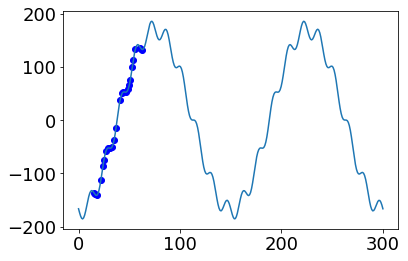

In [13]:
plt.plot(x,foldpts,'bo')
plt.plot(x_,fold)

In [14]:
fourierseries = bayesian_fourier_series_model(xx1,yy1,2)
fourierseries.add_reference_foldshape(x_,fold)
fourierseries.add_reference_foldlocations(x,foldpts)
fourierseries.add_reference_foldprofile(x_,foldrot)
fourierseries.find_wavelength()
fourierseries.wavelengths= [fourierseries.wavelengths[0]]#,180.]
#if len()
#fourierseries.wavelengths.append(200.)
#sv = s_variogram(x,foldrot[x])
#sv.setup()
#sv.find_wavelengths()
#plt.plot(sv.lags,sv.variance)

#plt.figure()
#print fourierseries.semivariogram.lags, fourierseries.semivariogram.variance
#plt.plot(fourierseries.semivariogram.lags,fourierseries.semivariogram.variance,'bo')
#print fourierseries.wavelengths
#fourierseries.wavelengths[1] = 180.
#fourierseries.wavelengths = [13.066,180] 
fourierseries.setup_inference()#_mixture()
#fourierseries.find_map()
fourierseries.run_sampler(10000,5000)
#scores = pymc.geweke(fourierseries.S, intervals=7)
#pymc.Matplot.geweke_plot(scores)
#pymc.Matplot.geweke_plot(pymc.geweke(fourierseries.S.trace('c_0')[:,]))
fourierseries_corrected = bayesian_fourier_series_model(xx1,yy1,2)
fourierseries_corrected.add_reference_foldshape(x_,fold)
fourierseries_corrected.add_reference_foldlocations(x,foldpts)
fourierseries_corrected.add_reference_foldprofile(x_,foldrot)
fourierseries_corrected.find_wavelength()
fourierseries_corrected.wavelengths= [fourierseries.wavelengths[0],150.]
#if len()
#fourierseries.wavelengths.append(200.)
#sv = s_variogram(x,foldrot[x])
#sv.setup()
#sv.find_wavelengths()
#plt.plot(sv.lags,sv.variance)

#plt.figure()
#print fourierseries.semivariogram.lags, fourierseries.semivariogram.variance
#plt.plot(fourierseries.semivariogram.lags,fourierseries.semivariogram.variance,'bo')
#print fourierseries.wavelengths
#fourierseries.wavelengths[1] = 180.
#fourierseries.wavelengths = [13.066,180] 
fourierseries_corrected.setup_inference()#_mixture()
#fourierseries.find_map()
fourierseries_corrected.run_sampler(10000,5000)
#scores = pymc.geweke(fourierseries.S, intervals=7)
#pymc.Matplot.geweke_plot(scores)
#pymc.Matplot.geweke_plot(pymc.geweke(fourierseries.S.trace('c_0')[:,]))

23.04 80.64


bayesian_fourier_series.py:383: UserWarning: Warning: converting a masked element to nan.
  variance[i] = np.mean(ma) / 2.


 [-----------------100%-----------------] 10000 of 10000 complete in 32.1 sec23.04 80.64
 [-----------------100%-----------------] 10000 of 10000 complete in 102.9 sec

True

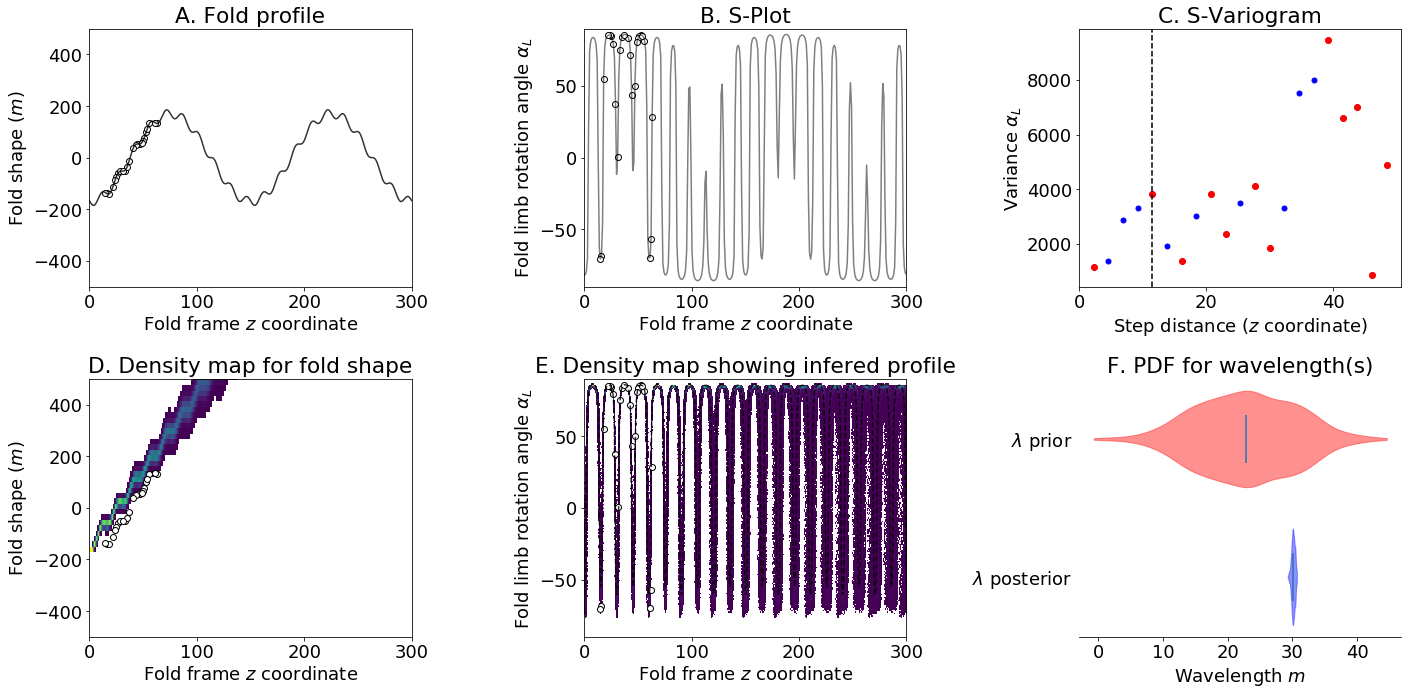

In [15]:
fig = bayesian_fourier_series_figure(fourierseries)
#fourierseries.semivariogram.
fig.plot_variogram()
fig.plot_reference_fold_points()
fig.plot_reference_fold_points('bo',0,1)
#fig.plot_reference_fold_shape('b-',0,1)

fig.plot_reference_fold_profile()
fig.plot_reference_fold_profile_points()
fig.plot_reference_fold_profile_points('bo',1,1)
#fig.plot_reference_fold_profile('b-',1,1)

fig.plot_reference_fold_shape()
fig.ax[0][0].set_title(r'A. Fold profile')
fig.ax[0][1].set_title(r'B. S-Plot')
fig.ax[0][2].set_title(r'C. S-Variogram')

fig.ax[1][1].set_title(r'E. Density map showing infered profile')
fig.ax[1][0].set_title(r'D. Density map for fold shape')
fig.ax[1][2].set_title(r'F. PDF for wavelength(s)')

fig.ax[0][0].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[0][1].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[0][2].set_xlabel(r'Step distance ($z$ coordinate)')

fig.ax[1][2].set_xlabel(r'Wavelength $m$')
#g.ax[1][2].set_ylabel(r'Probability')

fig.ax[0][1].set_ylabel(r'Fold limb rotation angle $\alpha_L$')
fig.ax[0][2].set_ylabel(r'Variance $\alpha_L$')

fig.ax[1][0].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[1][0].set_ylabel(r'Fold shape ($m$)')
fig.ax[0][0].set_ylabel(r'Fold shape ($m$)')

fig.ax[1][1].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[1][1].set_ylabel(r'Fold limb rotation angle $\alpha_L$')
H2 = fig.plot_curve_density(0,300)
fig.plot_fold_heat_map(fig.fourier_series_model.reference_fold_y[0])
#for i in range(10):
#    c, w = fig.plot_random_curve(i)
#print c,w
fig.plot_map(0,300,'k--')
#print ,fig.fourier_series_model.map.qw[1].value
colours = ['b-','r-']
#for i in range(len(fig.fourier_series_model.wavelengths)):
temp = fig.ax[0][0]
i = 0

arrays = []
pos = []
labels = []
c = len(fourierseries.wavelengths)
for i in range(len(fourierseries.wavelengths)):
    arrays.append(np.random.normal(fourierseries.wavelengths[i],fourierseries.wavelengths[i]/3.,1000))
    labels.append(r"$\lambda$ prior")
    pos.append(c)
    c-=1
    arrays.append(fourierseries.S.trace('qw_%i'%i)[:][:])
    labels.append(r"$\lambda$ posterior")

    pos.append(c)
    c-=1
fig.plot_violin(1,2,labels,pos,arrays)
plt.tight_layout()
for i in range(2):
    for j in range(2):
        fig.ax[i][j].set_xlim(0,300)
fig.ax[0][0].set_ylim(-500,500)
fig.ax[1][0].set_ylim(-500,500)

fig.ax[1][2].spines['top'].set_visible(False)
fig.ax[1][2].spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
fig.ax[1][2].spines['left'].set_visible(False)
fig.ax[1][2].tick_params(top='off', bottom='on', left='off', right='off', labelleft='on', labelbottom='on')

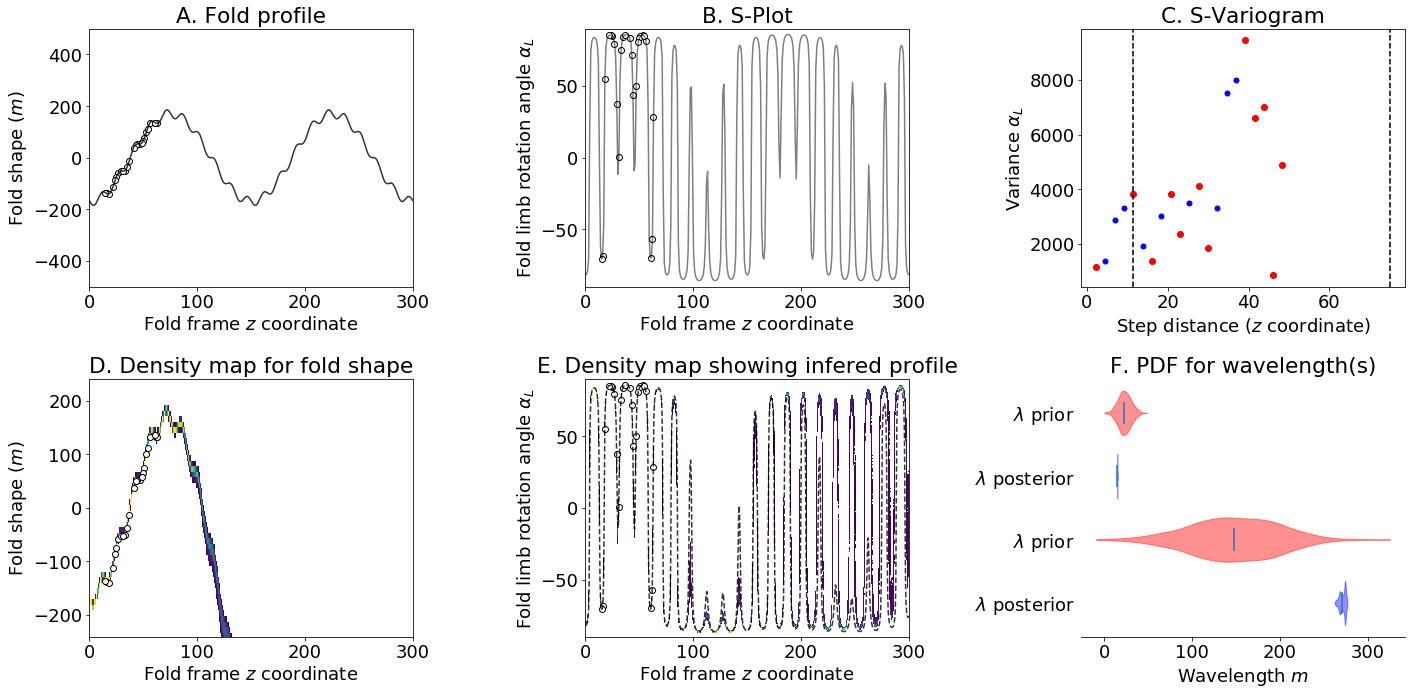

In [17]:
fig = bayesian_fourier_series_figure(fourierseries_corrected)
#fourierseries.semivariogram.
fig.plot_variogram()
fig.plot_reference_fold_points()
fig.plot_reference_fold_points('bo',0,1)
#fig.plot_reference_fold_shape('b-',0,1)

fig.plot_reference_fold_profile()
fig.plot_reference_fold_profile_points()
fig.plot_reference_fold_profile_points('bo',1,1)
#fig.plot_reference_fold_profile('b-',1,1)

fig.plot_reference_fold_shape()
fig.ax[0][0].set_title(r'A. Fold profile')
fig.ax[0][1].set_title(r'B. S-Plot')
fig.ax[0][2].set_title(r'C. S-Variogram')

fig.ax[1][1].set_title(r'E. Density map showing infered profile')
fig.ax[1][0].set_title(r'D. Density map for fold shape')
fig.ax[1][2].set_title(r'F. PDF for wavelength(s)')

fig.ax[0][0].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[0][1].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[0][2].set_xlabel(r'Step distance ($z$ coordinate)')

fig.ax[1][2].set_xlabel(r'Wavelength $m$')
#g.ax[1][2].set_ylabel(r'Probability')

fig.ax[0][1].set_ylabel(r'Fold limb rotation angle $\alpha_L$')
fig.ax[0][2].set_ylabel(r'Variance $\alpha_L$')

fig.ax[1][0].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[1][0].set_ylabel(r'Fold shape ($m$)')
fig.ax[0][0].set_ylabel(r'Fold shape ($m$)')

fig.ax[1][1].set_xlabel(r'Fold frame $z$ coordinate')
fig.ax[1][1].set_ylabel(r'Fold limb rotation angle $\alpha_L$')
H2 = fig.plot_curve_density(0,300)
fig.plot_fold_heat_map(fig.fourier_series_model.reference_fold_y[0])
#for i in range(10):
#    c, w = fig.plot_random_curve(i)
#print c,w
fig.plot_map(0,300,'k--')
#print ,fig.fourier_series_model.map.qw[1].value
colours = ['b-','r-']
#for i in range(len(fig.fourier_series_model.wavelengths)):
temp = fig.ax[0][0]
i = 0
#temp = fig.plot_kde('c_%i'%(i),1,2,'c_%i'%i,colours[i])s" available and you have to piss before a ride you can use one while in your car and it's very discreet and convenient.
    #except:
    #    print "fail"
    #if i == 0:
    #    temp = fig.plot_normal_pdf(1,2,fig.fourier_series_model.wavelengths[i],\
    #                    fig.fourier_series_model.wavelengths[i]/3.,\
    #                    'prior_wavelength_%i'%i, colours[i]+'-')
    #else:
    #    fig.plot_normal_pdf2(temp,fig.fourier_series_model.wavelengths[i],\
    #                    fig.fourier_series_model.wavelengths[i]/3.,\
    #                    'prior_wavelength_%i'%i, colours[i]+'-')
    # print fig.fourier_series_model.map.qw[i].value
    #temp.legend(loc=i)
    #fig.plot
arrays = []
pos = []
labels = []
c = len(fourierseries_corrected.wavelengths)
for i in range(len(fourierseries_corrected.wavelengths)):
    arrays.append(np.random.normal(fourierseries_corrected.wavelengths[i],fourierseries_corrected.wavelengths[i]/3.,1000))
    labels.append(r"$\lambda$ prior")
    pos.append(c)
    c-=1
    arrays.append(fourierseries_corrected.S.trace('qw_%i'%i)[:][:])
    labels.append(r"$\lambda$ posterior")

    pos.append(c)
    c-=1
fig.plot_violin(1,2,labels,pos,arrays)
plt.tight_layout()
for i in range(2):
    for j in range(2):
        fig.ax[i][j].set_xlim(0,300)
fig.ax[0][0].set_ylim(-500,500)
#fig.ax[1][0].set_ylim(-500,500)

fig.ax[1][2].spines['top'].set_visible(False)
fig.ax[1][2].spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
fig.ax[1][2].spines['left'].set_visible(False)
fig.ax[1][2].tick_params(top='off', bottom='on', left='off', right='off', labelleft='on', labelbottom='on')